<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch03_04_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%8C%80%ED%91%9C%ED%86%B5%EA%B3%84%EB%9F%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04. 기초통계 - 대표통계량
---
* 날짜:
* 이름:

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import *
plt.rcParams['figure.figsize'] = [12, 8]                 # 출력 크기 (x12 y8)
plt.style.use('dark_background')                         # 메타포트 레이아웃 - 검은 바탕
sns.set_style(sns.set(color_codes=True))                 # 시본 레이아웃 - 컬러코드

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [58]:
# 넘파이 랜덤 시드 0으로 설정

# 넘파이 배열 `a`로 바인딩

# 판다스 시리즈 `s`로 바인딩

a = np.random.randint(1, 100, 10)
s = pd.Series(a)

* 데이터 분포 그리기

(array([1., 2., 0., 2., 0., 1., 1., 0., 0., 3.]),
 array([ 9. , 15.2, 21.4, 27.6, 33.8, 40. , 46.2, 52.4, 58.6, 64.8, 71. ]),
 <a list of 10 Patch objects>)

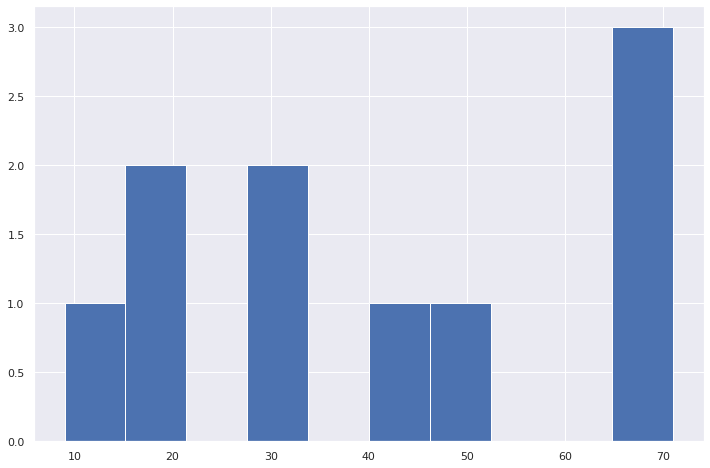

In [60]:
plt.hist(s)

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [61]:
print(np.median(a))
print(s.median())

36.0
36.0


### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [62]:
print(np.mean(a))
print(s.mean())

40.0
40.0


### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [63]:
def harmonic( x ):
    return len( x ) / (1/x)

* 조화 평균 계산

In [64]:
print(harmonic(a))

[710. 670.  90. 480. 210. 670. 170. 310. 410. 280.]


### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [65]:
print(trim_mean(a, 0.2))

39.333333333333336


## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [66]:
# 넘파이 랜덤 시드 0으로 설정

# 넘파이 배열 `a`로 바인딩

# 판다스 시리즈 `s`로 바인딩
k = np.arange(1, 10)
a2 = np.random.choice(k, 20)
s2 = pd.Series(a2)

* 데이터 분포 그리기

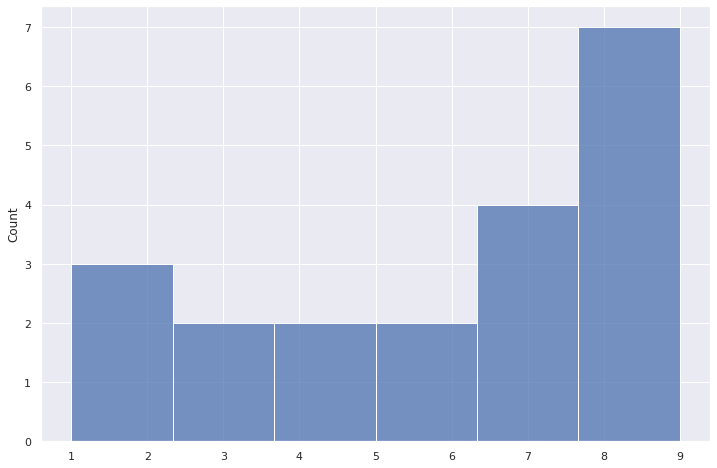

In [68]:
sns.histplot(s2)

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [69]:
s2.value_counts()

8    5
7    4
4    2
3    2
1    2
9    2
2    1
6    1
5    1
dtype: int64

* 사이파이 함수 `mode` 사용하기

In [70]:
mode(a2)

ModeResult(mode=array([8]), count=array([5]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

In [ ]:
nums = np.random.normal(200, 50, 100)
n = list(nums)
n

In [ ]:
sns.histplot(nums)

In [228]:
nums = np.random.normal(200, 50, 100)
nb = list(nums)
n = list(nums)

num10 = np.array([100000.])
n.append(num10[0])
lenp = np.arange(1, 102)
numpd = pd.DataFrame({ 'INT' : n , 'LEN' : lenp })
numpd = numpd #/ 100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


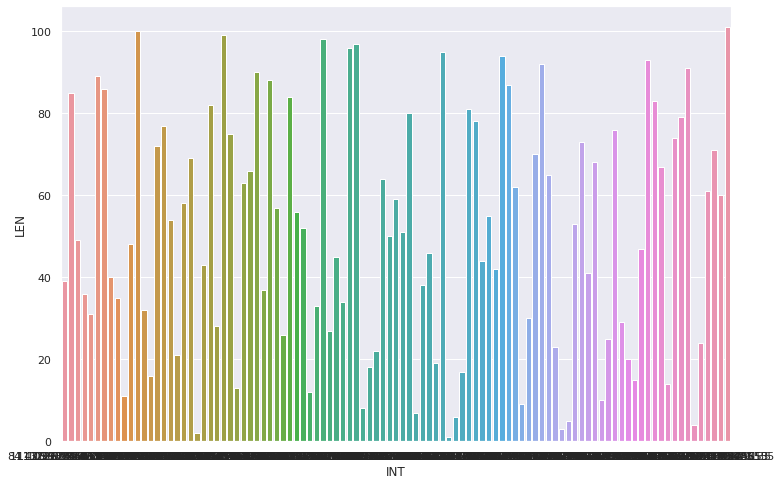

In [232]:
_ = sns.barplot(numpd['INT'], numpd['LEN'])

In [193]:
def san(x):
    return sum(x) / len(x)

def juel(x):
    return trim_mean(x, 0.1)

In [194]:
print(f'추가 전 : {round(san(nb), 7)}, 추가 후 : {round(san(n), 7)} // 소수 7번째 자리에서 반올림')
print(f'추가 전 : {round(juel(nb), 7)}, 추가 후 : {round(juel(n), 7)} // 소수 7번째 자리에서 반올림')

추가 전 : 200.3627964, 추가 후 : 1188.4780162 // 소수 7번째 자리에서 반올림
추가 전 : 202.7782856, 추가 후 : 203.3866513 // 소수 7번째 자리에서 반올림


#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [235]:
# 기본 지정
import pandas as pd
import numpy as np
# .csv 파일 형식 불러오기
train = pd.read_csv('/content/train.csv')

# 곁측치, 빈 값을 호출, 0이라면 없음 상수면 있음.
# isnull은 비어있는 값, 즉 null인 슬롯 하나당 1 반환, sum으로 각 개체 열합
nulltrain = train.isnull().sum()

# 최상단 5줄(분류자 포함) 로드
# head는 맨 위(분류자 또한 1번 줄)부터 5번 줄까지 반환
printtrain = train.head(5)

# 최소 최대 평균 등의 분포도 로드
# describe는 각 열의 측정값(최소 최대 총합 평균 등등)을 반환
destrain = train.describe()

# .dtypes 메소드를 사용하여 해당 열들의 객체 타입 로드
# dtypes은 기준이 되는 열이나 행의 객체 타입 반환
dtypetrain = train.dtypes

# 객실의 칸 정보(단일값) 과, 승선한 항구의 정보(3종류 + 눌)
# unique는 해당 열(기준값)의 겹치지 않은 데이터값(단일값)을 반환
cabintrain = train.Cabin.unique()
embarkedtrain = train.Embarked.unique()

# 생존 인원, 비생존 인원, 총 인원
# 생존은 1, 비생존은 0으로 저장되어있으므로, 생존 항목 모든 값을 더하면 생존 인원수 반환,
#           총 행의 갯수 에서 생존 인원 수를 뺴면 비생존 인원 수 반환.
survival = train.Survived.sum()
n_survival = train.shape[0] - survival
print(f'총 인원 {survival+n_survival}')
print(f'생존자 {survival}\n사망자 {n_survival}')

# 변수 지정 슬롯(순서가 다른곳이어도 이곳에 변수 모으기)
# 1 | 변수y에 학습할 목표변수인 Survived필드값을 담기.
y = train.Survived

# 1,2,3등급의 인원(신분) 분류
# Pclass 열 중 1,2,3 의 value값에 해당하는 인원 을 counts로 세어서 반환 
pclasstrain = train['Pclass'].value_counts()
print(f'1등급 인원 {pclasstrain[1]}\n2등급 인원 {pclasstrain[2]}\n3등급 인원 {pclasstrain[3]}')

# 남성/여성으로 분류
# Sex의 male값과 female값을 counts해서 반환
sextrain = train['Sex'].value_counts()
print(f'남성 {sextrain[1]}\n여성 {sextrain[0]}')

# 2개의 곁측치는 Southampton로 변환
# 비어있는 null값에 S 채워넣고(fillna), S, C, Q 값을 counts해서 반환
train['Embarked'] = train['Embarked'].fillna('S')
embartrain = train['Embarked'].value_counts()
print(f'Southampton {embartrain[0]}\nCherbourg {embartrain[1]}\nQueenstown {embartrain[2]}')

# median으로 Age의 중간값을 로드해서 fillna함수를 사용하여 곁측치(null)을 Age의 중간값으로 변환
train['Age'] = train['Age'].fillna(train['Age'].median())

# name에서 신분을 나타내는 단어를 title에 할당
# extract메소드를 사용하여 정규 식을 넣으면 해당하는 문자열을 반환
# replace메소드를 이용, 기준 리스트의 문자열을 2번 인자 문자열로 치환
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train['Title'] = train['Title'].replace(['Jonkheer', 'Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')
train['Title']


# 나이형 변수 선언
# 0~18,19~25,26~35,36~60,61~100 순으로 'Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior' 그룹에 각각 할당.
# 할당한 그룹마다의 객체 수 카운트
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
agetrain = train['AgeGroup'].value_counts()
print(agetrain)

총 인원 891
생존자 342
사망자 549
1등급 인원 216
2등급 인원 184
3등급 인원 491
남성 314
여성 577
Southampton 646
Cherbourg 168
Queenstown 77
YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64


In [ ]:
21